In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("mobile data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1560
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
x = df.drop(['price_range'],axis=1)
y=df['price_range']

In [8]:
y.value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

# Extra Trees Classifier

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
extr = ExtraTreesClassifier()

In [11]:
extr.fit(x,y)

ExtraTreesClassifier()

In [12]:
feature_importance = extr.feature_importances_
feature_importance

array([0.06183932, 0.01987852, 0.03274178, 0.01921548, 0.0329    ,
       0.01719561, 0.03622114, 0.0336829 , 0.03585115, 0.03358148,
       0.03366634, 0.04829392, 0.04865878, 0.38882956, 0.03426259,
       0.03389418, 0.03607596, 0.01429621, 0.01915868, 0.0197564 ])

In [13]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head(18)

,Gain_Score
0,0.061839
1,0.019879
2,0.032742
3,0.019215
4,0.032900
5,0.017196
6,0.036221
7,0.033683
8,0.035851
9,0.033581


In [14]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [15]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols.head(18)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [16]:
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,battery_power,0.061839
1,blue,0.019879
2,clock_speed,0.032742
3,dual_sim,0.019215
4,fc,0.032900
5,four_g,0.017196
6,int_memory,0.036221
7,m_dep,0.033683
8,mobile_wt,0.035851
9,n_cores,0.033581


In [17]:
gains.nlargest(18,'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.388830
0,battery_power,0.061839
12,px_width,0.048659
11,px_height,0.048294
6,int_memory,0.036221
16,talk_time,0.036076
8,mobile_wt,0.035851
14,sc_h,0.034263
15,sc_w,0.033894
7,m_dep,0.033683


In [18]:
newx = gains.nlargest(18,'Gain_Score')
newx

,Feature_Names,Gain_Score
13,ram,0.388830
0,battery_power,0.061839
12,px_width,0.048659
11,px_height,0.048294
6,int_memory,0.036221
16,talk_time,0.036076
8,mobile_wt,0.035851
14,sc_h,0.034263
15,sc_w,0.033894
7,m_dep,0.033683


<AxesSubplot:>

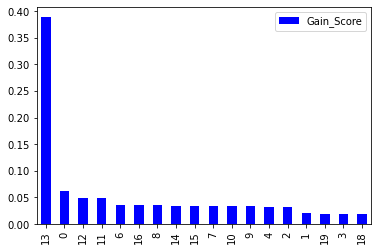

In [19]:
newx.plot(kind='bar',color=['blue'])

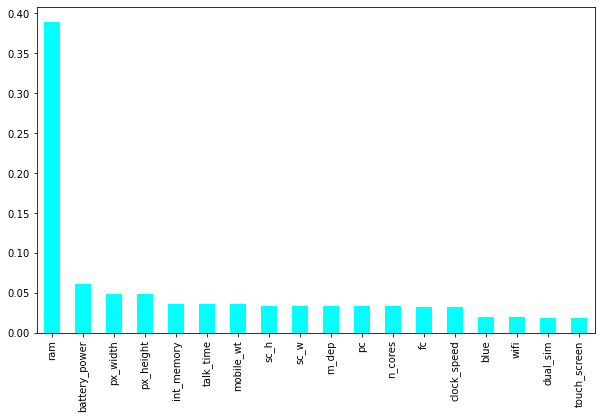

In [20]:
import matplotlib.pyplot as plt
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(18).plot(kind='bar', color='cyan')
plt.savefig('score1.png')

# Select K best

In [21]:
df = pd.read_csv("mobile data.csv")
x = df.drop(['price_range'],axis=1)
y = df['price_range']

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [23]:
model2 = SelectKBest(score_func=chi2)

In [24]:
feature_score = model2.fit(x,y)

In [25]:
feature_score.scores_

array([1.39586914e+04, 6.97326729e-01, 8.05207989e-01, 7.21201743e-01,
       1.08792477e+01, 1.67755233e+00, 9.10777214e+01, 8.18368892e-01,
       9.68349858e+01, 8.94343722e+00, 9.71630692e+00, 1.73878228e+04,
       9.75834069e+03, 9.32330107e+05, 9.52154288e+00, 1.57771687e+01,
       1.35408021e+01, 3.14971336e-01, 2.17263851e+00, 3.87643714e-01])

In [26]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,13958.691431
1,0.697327
2,0.805208
3,0.721202
4,10.879248
5,1.677552
6,91.077721
7,0.818369
8,96.834986
9,8.943437


In [27]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [28]:
col2 = pd.DataFrame(x.columns, columns=['Feature_Names'])
col2.head()

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [29]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,battery_power,13958.691431
1,blue,0.697327
2,clock_speed,0.805208
3,dual_sim,0.721202
4,fc,10.879248
5,four_g,1.677552
6,int_memory,91.077721
7,m_dep,0.818369
8,mobile_wt,96.834986
9,n_cores,8.943437


In [30]:
newx = scores.nlargest(18,'Feature_Scores')
newx

,Feature_Names,Feature_Scores
13,ram,932330.107389
11,px_height,17387.822803
0,battery_power,13958.691431
12,px_width,9758.340687
8,mobile_wt,96.834986
6,int_memory,91.077721
15,sc_w,15.777169
16,talk_time,13.540802
4,fc,10.879248
10,pc,9.716307
